In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#DATASET
X = np.array([[4,3],[1,2],[2,0],[2,1],[4,1],[3,0],[2,3],[1,0],[2,4],[3,2]])
N = len(X)
Y = np.array([1,0,0,0,1,0,1,0,1,1])

In [ ]:
from pyparsing.util import LRUMemo
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# error function
def J(Y, y_hat):
    return -1/N * ( np.dot(Y, np.log(y_hat)) + np.dot((1 - Y), np.log(1 - y_hat)) )

# forward pass
def forward(W, B):
    z = np.dot(X, W) + B
    y_hat = sigmoid(z)
    # compute derivatives
    D_z = y_hat - Y # derivative wrt z (derivative wrt B)
    D_W = np.dot(X.T, D_z) # derivative wrt W
    
    return D_W/N, sum(D_z)/N

# fit the model to data (backpropagation)
def fit(W, B, LR, epochs):
    for i in range(epochs):
        D_W, D_B = forward(W, B)
        # update weights
        W -= D_W*LR
        B -= D_B*LR
    return W,B



# Parameters
LR = 0.4
epochs = 1000

# Initialize weights randomly
B = np.random.normal(0, 1, (1,)) # B = [a]
W = np.random.normal(0, 1, (2,)) # W = [a, b]

print('Error (before) =', J(Y, sigmoid(np.dot(X, W) + B)))
print('Result: slope and interceptor')
W, B = fit(W, B, LR, epochs)
# slope and the interceptor
m = -W[0]/W[1]
b = -B[0]/W[1]
print('m =', m, 'b =', b)
print('Error (after) =', J(Y, sigmoid(np.dot(X, W) + B)))

Error (before) = 0.3863246889545233
Result: slope and interceptor
m = -0.9233050173935627 b = 3.721434011295312
Error (after) = 0.040890634351217925


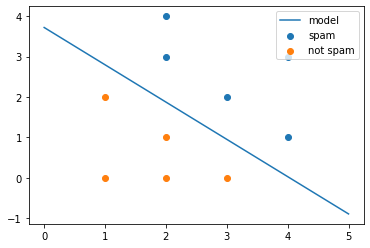

In [ ]:
# PLOT DATA
x = np.linspace(0,5,100)
y = m*x + b
plt.plot(x, y, label='model')
spam = [(X[i][0], X[i][1]) for i in range(N) if Y[i] == 1]
nospam = [(X[i][0], X[i][1]) for i in range(N) if Y[i] == 0]
plt.scatter([s[0] for s in spam], [s[1] for s in spam], label='spam')
plt.scatter([s[0] for s in nospam], [s[1] for s in nospam], label='not spam')
plt.legend()
plt.show()